Import primary dependencies

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb



Import the “Life_Expectancy_Data.csv” dataset using Pandas

In [30]:
le_df = pd.read_csv('Life_Expectancy_Data.csv')

Check if missing values exist in the data, perform feature engineering to eliminate or fill missing values

In [ ]:
print(le_df.info())
le_df.isnull().sum() # [np.where(le_df.isnull().sum() != 0)[0]]

,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0
BMI,34


Replace categorical variables with one hot encoding since they have a low cardinality

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


print(le_df['Status'].unique())
# prepocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False),['Status'])], remainder='passthrough')
# le_df_1 = pd.DataFrame(prepocessor.fit_transform(le_df))
# onehot_col = prepocessor.named_transformers_['onehot'].get_feature_names_out(['Status'])
# new_col = list(onehot_col) + list(le_df.columns.drop('Status'))
# le_df_1.columns = new_col
# print(le_df_1.head())
le_df = pd.get_dummies(le_df, columns = ['Status'], drop_first = True)
le_df['Status_Developing']= le_df['Status_Developing'].astype(int)
le_df.head()

['Developing' 'Developed']


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1


Fill missed values with mean values

In [33]:
le_df = le_df.apply(lambda x: x.fillna(x.mean()), axis = 0)
le_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developing
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,...,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,...,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,0.825732
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,...,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381,0.379405
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,...,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000,1.000000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,...,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000,1.000000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,...,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000,1.000000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,...,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000,1.000000


List the minimum, average and maximum life expectancy

In [ ]:
print(f'Min: {le_df["Life expectancy "].min():.2f}')
print(f'Mean: {le_df["Life expectancy "].mean():.2f}')
print(f'Max: {le_df["Life expectancy "].max():.2f}')

Min: 36.30
Mean: 69.22
Max: 89.00


Plot the histogram, pairplot and correlation heatmap for all features

In [ ]:
le_df.hist(bins = 30, figsize = (20, 20), color = 'r');

Pairplot

In [ ]:
# Plot pairplot
plt.figure(figsize = (20,20))
sns.pairplot(le_df)

Output hidden; open in https://colab.research.google.com to view.

Heatmap

<Axes: >

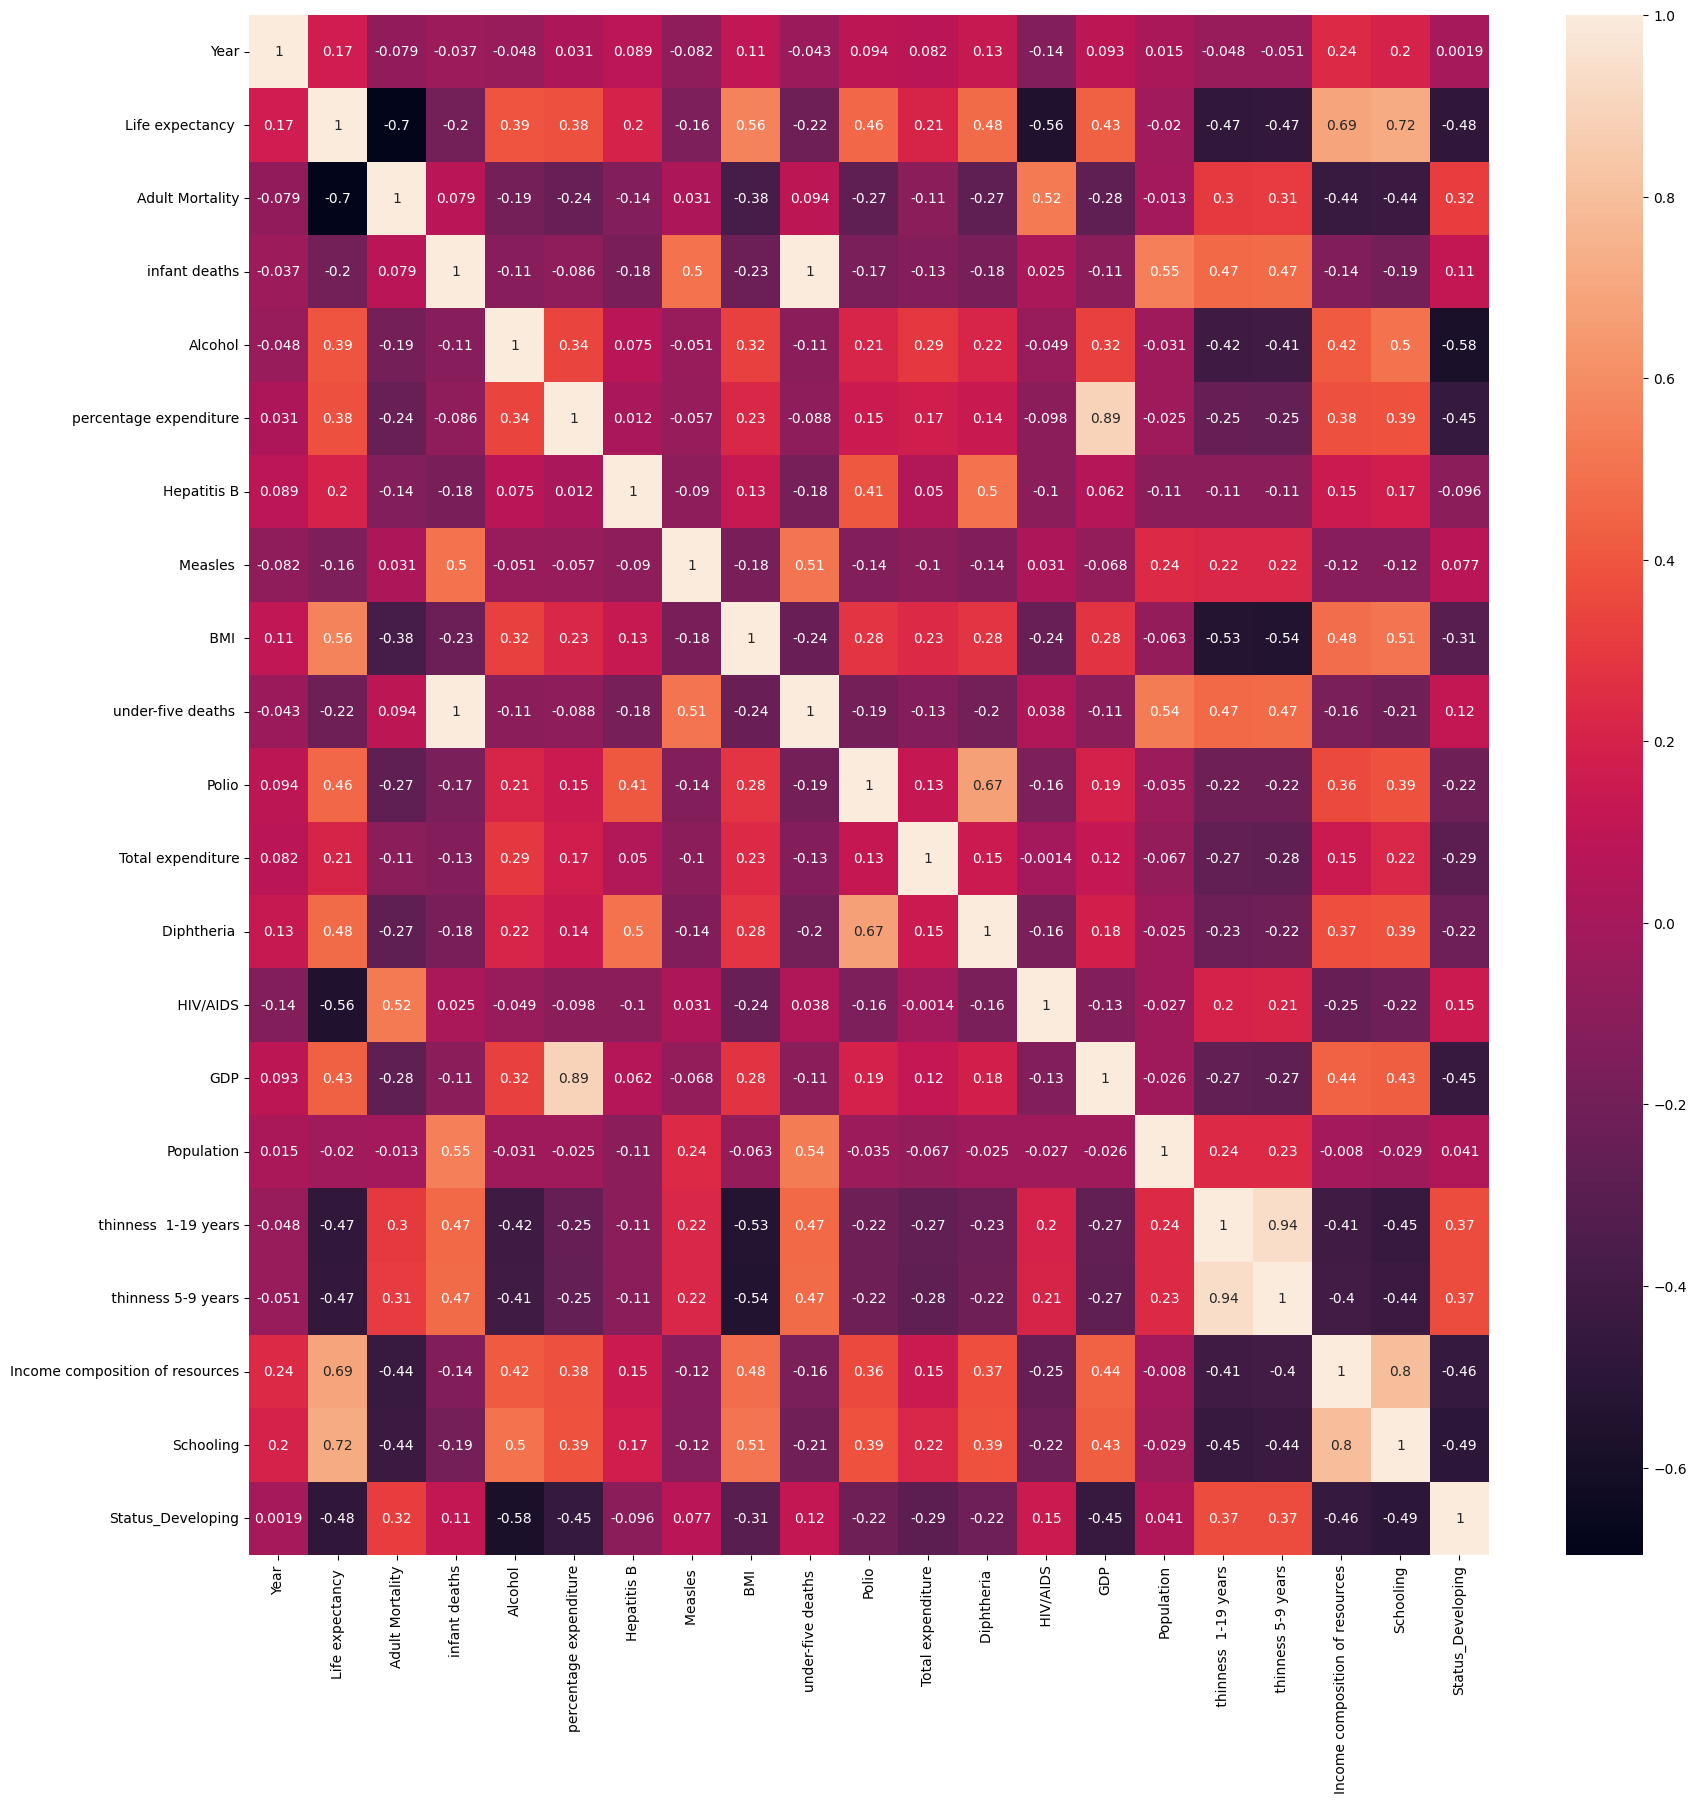

In [27]:
plt.figure(figsize = (20,20))
corr = le_df.corr()
sns.heatmap(corr, annot = True)


Plot the scatterplot between “Income composition of resources” and “life expectancy”, use “status” for hue attribute. Comment on the plot

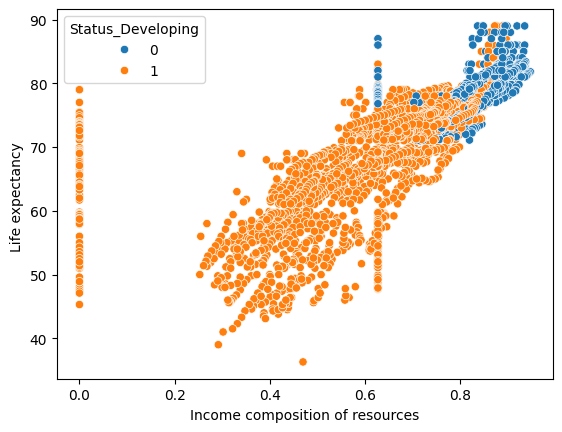

In [34]:
# Note that there is space after 'Life expectancy '
sns.scatterplot(x = 'Income composition of resources', y = 'Life expectancy ', hue = 'Status_Developing', data = le_df);

Plot the scatterplot between “Schooling” and “life expectancy”, use status for hue attribute. Comment on the scatterplot. Comment on the plot

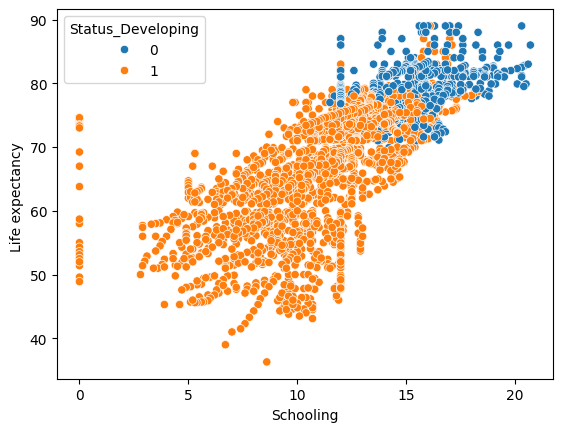

In [35]:
sns.scatterplot(x = 'Schooling', y = 'Life expectancy ', hue = 'Status_Developing', data = le_df);

Split the data into 80% for training and 20% for testing

In [37]:
from sklearn.model_selection import train_test_split

X = le_df.drop('Life expectancy ', axis = 1)
y = le_df['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


Train an XG-boost algorithm

In [48]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.05, max_depth=10, eval_metric='rmse', early_stopping_rounds=5)
xgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=5,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Assess trained regression model performance, what is R2?

In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
prediction = xgb_model.predict(X_test)

n = X_test.shape[0]
k = X_test.shape[1]
RMSE = float(format(np.sqrt(mean_squared_error(y_test, prediction)),'.3f'))
MSE = mean_squared_error(y_test, prediction)
MAE = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)
print("R2sklearn: " + str(r2))

adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
print("Adjusted R2: " + str(adj_r2))


score = xgb_model.score(X_test, y_test)
print(f'R2: {score:.2f}')
print(prediction.shape)
print(y_test.shape)
res = np.concatenate((y_test.to_numpy().reshape(-1,1), prediction.reshape(-1,1)), axis = 1)
res

R2sklearn: 0.9696338031930187
Adjusted R2: 0.9685626851398624
R2: 0.97
(588,)
(588,)


array([[73.7       , 73.29753876],
       [75.9       , 75.65657806],
       [74.2       , 74.99232483],
       ...,
       [61.1       , 67.30039978],
       [69.6       , 69.79579163],
       [74.        , 73.31060791]])

Plot trained model predictions vs. ground truth output

<Axes: xlabel='Life expectancy '>

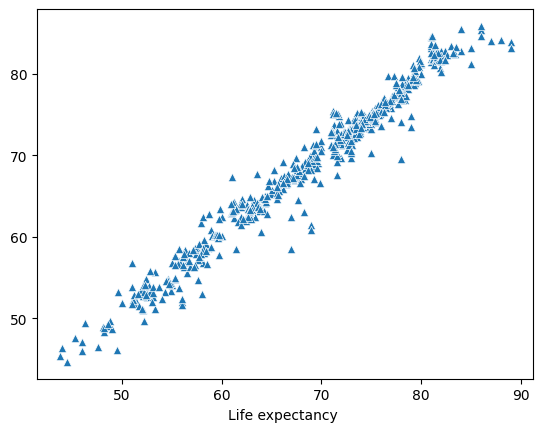

In [46]:
sns.scatterplot(x = y_test, y = prediction,marker="^")